In [1]:
import os
import sys

import numpy as np
from matplotlib import pyplot as plt

sys.path.append('../bin')
from corr_plots import mock, plot_fiber_collisions, plot_delta_fiber_collisions, get_average_multipole

plt.style.use(os.path.join(os.path.abspath(''), 'plot_style.mplstyle'))
plots_dir = '../../plots/'

<Figure size 1500x1000 with 0 Axes>

/global/common/software/desi/users/adematti/perlmutter/cosmodesiconda/20231013-1.0.0/code/pycorr/main/lib/python3.10/site-packages/pycorr/twopoint_estimator.py:1070: RuntimeWarning: invalid value encountered in scalar divide
  correll[i_s] = np.sum(corr_s[mask_s] * legendre[mask_s], axis=-1) / np.sum(dmu[mask_s])


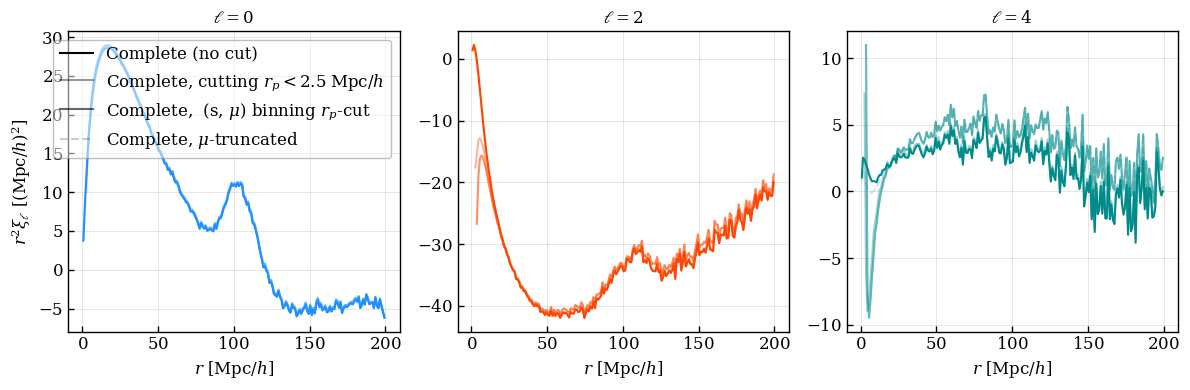

In [2]:
nmocks = 25
ells = (0, 2, 4)
mocks = [mock(id, "SGC", 'ELG', rebin=(1, 1), rp_threshold=2.5) for id in range(nmocks)]
plot_fiber_collisions(mocks, mp=ells)
plt.savefig(os.path.join(plots_dir, 'corr_rpcut_smubinning_SGC_ELG.png'))
plt.show()

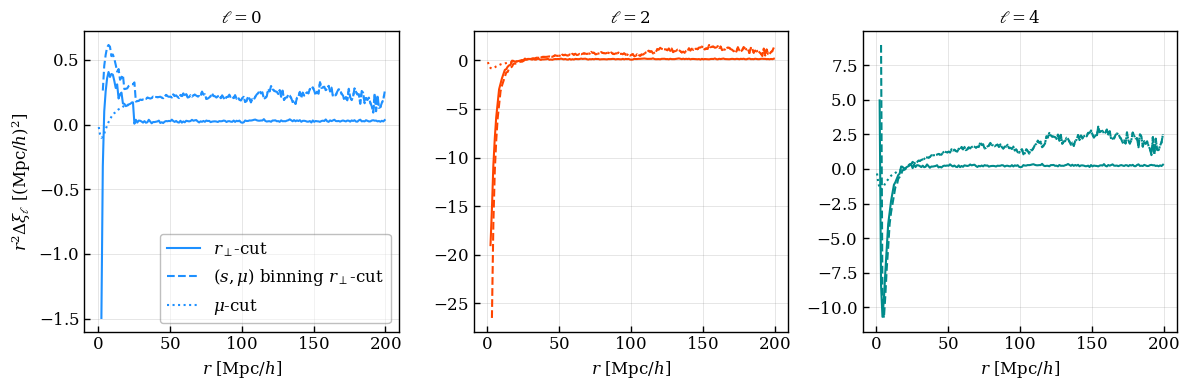

In [9]:
mp = (0, 2, 4)
power = 2
r = mocks[0].xi_mp[0]

fig,axs = plt.subplots(1, 3, figsize=(12, 4), sharey=False)
color=['dodgerblue', 'orangered', 'darkcyan', 'firebrick', 'violet', 'olivedrab', 'gold', 'limegreen', 'darkorange', 'darkviolet', 'deepskyblue']

for i, ell in enumerate(mp):
    avg_mp = get_average_multipole(mocks, i)
    res_nocut, std_nocut = avg_mp['xi_complete_mp']
    res_tr, std_tr = avg_mp['xi_complete_mp_tr']
    res_cut1, std_cut1 = avg_mp['xi_complete_mp_rpcut']
    res_cut2, std_cut2 = avg_mp['xi_complete_mp_smu_rpcut']
    axs[i].plot(r, r**power*(res_cut1-res_nocut), color='C{}'.format(i), label=r'$r_{\perp}$-cut', ls='-')
    axs[i].plot(r, r**power*(res_cut2-res_nocut), color='C{}'.format(i), label=r'$(s, \mu)$ binning $r_{\perp}$-cut', ls='--')
    axs[i].plot(r, r**power*(res_tr-res_nocut), color='C{}'.format(i), label=r'$\mu$-cut', ls=':')
    axs[i].set_xlabel('$r$ [Mpc/$h$]')
    axs[i].set_title(r'$\ell={:d}$'.format(ell))
axs[0].legend()
axs[0].set_ylabel(r'$r^2 \Delta \xi_\ell$ [$(\mathrm{Mpc}/h)^{2}$]')
fig.tight_layout(pad=0.3)